In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\manim\Downloads\20th, 21st , 22nd - Clustering,iq, RP\20th, 21st , 22nd - Clustering,iq, RP\student mark price prediction\student_info.csv')

In [3]:
data

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
data.shape

(200, 2)

In [7]:
# discover and visualize the data to gain insights

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


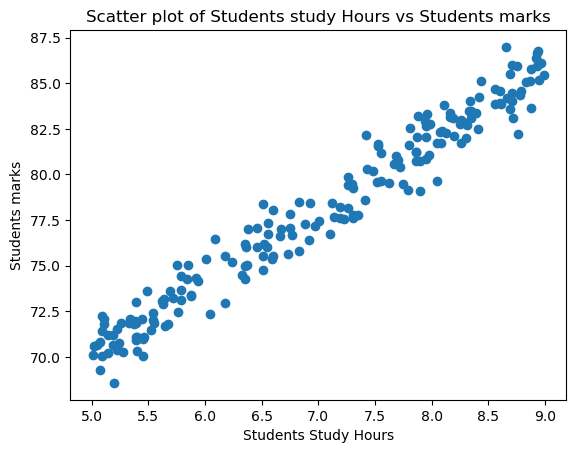

In [10]:
plt.scatter(x=data.study_hours,y=data.student_marks)
plt.xlabel('Students Study Hours')
plt.ylabel('Students marks')
plt.title('Scatter plot of Students study Hours vs Students marks')
plt.show()

In [11]:
# prepare the data for machine learning algorithms

In [12]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [14]:
data2=data.fillna(data.mean())

In [15]:
data2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [16]:
data2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [17]:
# split dataset

In [18]:
X=data2.drop('student_marks',axis='columns')
y=data2.drop('study_hours',axis='columns')
print('shape of X=',X.shape)
print("shape of y=",y.shape)

shape of X= (200, 1)
shape of y= (200, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)


shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [20]:
# select a model and train it


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.coef_

array([[3.93571802]])

In [24]:
lr.intercept_

array([50.44735504])

In [25]:
m=3.93
c=50.44
y=m*4+c
y

66.16

In [26]:
lr.predict([[4]])[0][0].round(2)

C:\Users\manim\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.19)

In [28]:
y_pred=lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [29]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [30]:
# fine-tune your model

In [31]:
lr.score(X_test,y_test)

0.9514124242154464

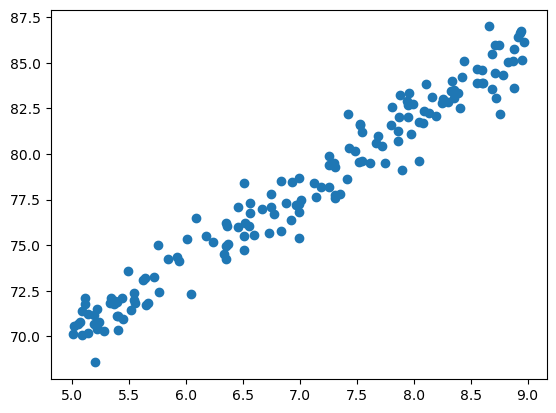

In [32]:
plt.scatter(X_train,y_train)

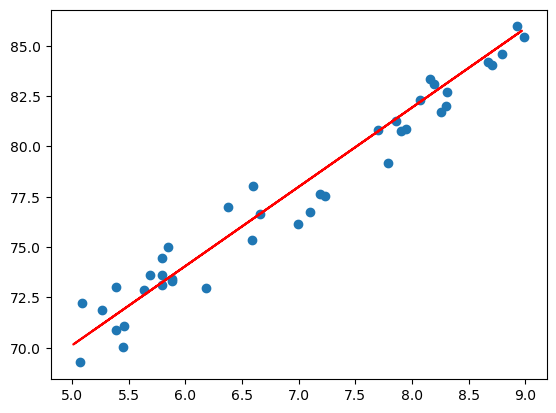

In [33]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='r')

In [34]:
# save ml model

In [35]:
import joblib
joblib.dump(lr,'student_mark_predictor.pkl')

['student_mark_predictor.pkl']

In [36]:
model=joblib.load("student_mark_predictor.pkl")

In [37]:
model.predict([[5]])[0][0]

C:\Users\manim\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.12594512018406)